In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

"""
    libraries used for feature engineering
"""
### Missing data
import missingno as ms  ## used for vis missing data
from sklearn.impute import SimpleImputer ## sklearn lib used for filling missing data
### outliers
from collections import Counter  ## used in droping outliers
### correlation matrix
#import association_metrics as am ## used for correlation matrix between categorical features
### feature scaling
from sklearn.preprocessing import StandardScaler  ## standard scalar will scale data from (-3 to 3)
### encoding categorical features
from sklearn.preprocessing import LabelEncoder ## for label encoding categorical features
from sklearn.compose import ColumnTransformer  ## used for onehot encoding categorical features
from sklearn.preprocessing import OneHotEncoder ## used for onehot encoding categorical features
### splitting data
from sklearn.model_selection import train_test_split ## used to split the data into training and testing
"""
    necessary libraries for hyperparameters and training and testing
"""
### for hyperparameter fine tuning
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV ## used for tuning the models parameters
### ML models
from sklearn.linear_model import LinearRegression   
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor   
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
### for printing a table
from prettytable import PrettyTable
from prettytable import ALL, FRAME
### Calculating R2, RMSE and cross-validation
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [63]:
## The training dataset
dataset = pd.concat(map(pd.read_csv, ['/Users/siddhantgupta/machine-learning-projects/house-prices-advanced-regression-techniques/redfin_2023-02-18-00-07-12.csv', 
                                      '/Users/siddhantgupta/machine-learning-projects/house-prices-advanced-regression-techniques/redfin_2023-02-18-00-10-14.csv',
                                      '/Users/siddhantgupta/machine-learning-projects/house-prices-advanced-regression-techniques/redfin_2023-02-18-00-10-50.csv']), ignore_index=True)
## dataset = pd.read_csv('/Users/siddhantgupta/machine-learning-projects/house-prices-advanced-regression-techniques/train.csv')

In [64]:
dataset.head(6)

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,PAST SALE,February-10-2023,Single Family Residential,33 194th St SW,Bothell,WA,98012,729000,3.0,2.5,...,Sold,NaN,NaN,https://www.redfin.com/WA/Bothell/33-194th-St-...,NWMLS,2024976.0,N,Y,47.822597,-122.234255
1,PAST SALE,February-9-2023,Single Family Residential,19614 3rd Dr SE #5,Bothell,WA,98012,1126969,4.0,3.5,...,Sold,NaN,NaN,https://www.redfin.com/WA/Bothell/19614-3rd-Dr...,NWMLS,2011488.0,N,Y,47.818215,-122.227297
2,PAST SALE,February-9-2023,Townhouse,19608 3rd Dr SE #8,Bothell,WA,98012,1130500,4.0,3.5,...,Sold,NaN,NaN,https://www.redfin.com/WA/Bothell/19608-3rd-Dr...,NWMLS,1981067.0,N,Y,47.820071,-122.227800
3,PAST SALE,February-8-2023,Single Family Residential,17724 2ND Ave W Unit IW-34,Bothell,WA,98012,1191385,5.0,3.0,...,Sold,NaN,NaN,https://www.redfin.com/WA/Bothell/17724-2ND-W-...,NWMLS,1999058.0,N,Y,47.821653,-122.236450
4,PAST SALE,February-3-2023,Townhouse,19620 3rd Dr SE #2,Bothell,WA,98012,960000,4.0,3.5,...,Sold,NaN,NaN,https://www.redfin.com/WA/Bothell/19620-3rd-Dr...,NWMLS,1986580.0,N,N,47.819601,-122.227489
5,PAST SALE,January-18-2023,Single Family Residential,226 Winesap Rd,Bothell,WA,98012,800000,3.0,2.5,...,Sold,NaN,NaN,https://www.redfin.com/WA/Bothell/226-Winesap-...,NWMLS,2010129.0,N,Y,47.824003,-122.229638


In [12]:
## shape of the training dataset
print('shape of the training dataset:')
print('There are {} rows and {} columns in train dataset.'.format(dataset.shape[0],dataset.shape[1]))

shape of the training dataset:
There are 848 rows and 27 columns in train dataset.


In [13]:
dataset.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [14]:
## Remove un-necessary columns
del dataset['SALE TYPE']
del dataset['DAYS ON MARKET']
del dataset['STATUS']
del dataset['NEXT OPEN HOUSE START TIME']
del dataset['NEXT OPEN HOUSE END TIME']
del dataset['URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)']
del dataset['SOURCE']
del dataset['MLS#']
del dataset['FAVORITE']
del dataset['INTERESTED']
del dataset['LATITUDE']
del dataset['LONGITUDE']

In [15]:
dataset.columns

Index(['SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE',
       'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS', 'LOCATION',
       'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', '$/SQUARE FEET', 'HOA/MONTH'],
      dtype='object')

In [16]:
## shows number of duplicated values in the dataset
print('Number of duplicated values in dataset: ', dataset.duplicated().sum())
print("*" * 100)

Number of duplicated values in dataset:  3
****************************************************************************************************


In [17]:
dataset[dataset.duplicated() == True]

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH
117,December-24-2020,Condo/Co-op,19815 2nd Dr SE #45,Bothell,WA,98012,730000,4.0,3.0,Bothell,2296.0,4932.0,2013.0,318.0,45.0
153,April-3-2020,Townhouse,15 197th Pl SW #07,Bothell,WA,98012,678065,3.0,3.5,Thrashers Corner,2175.0,2348.0,2020.0,312.0,90.0
194,October-15-2019,Townhouse,7 197th Pl SW #11,Bothell,WA,98012,694950,4.0,3.5,Thrashers Corner,2431.0,2817.0,2019.0,286.0,90.0


In [18]:
## Remove duplicate rows from the dataframe 
if dataset.duplicated().sum() > 0:
    dataset = dataset.drop_duplicates()

In [19]:
## Taking care of missing data

## Columns having NAN values
dataset.columns[dataset.isnull().sum() > 0] 

Index(['SOLD DATE', 'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE',
       'YEAR BUILT', '$/SQUARE FEET', 'HOA/MONTH'],
      dtype='object')

In [20]:
## No concept of lot size for condos, townhouses and mobile homes
print('Number of condos with lot size 0 are ' + str(dataset.loc[(dataset['PROPERTY TYPE'] == 'Condo/Co-op') & (dataset['LOT SIZE'].isna())].shape[0]))
print('Number of Townhouse with lot size 0 are ' + str(dataset.loc[(dataset['PROPERTY TYPE'] == 'Townhouse') & (dataset['LOT SIZE'].isna())].shape[0]))
print('Number of Mobile/Manufactured Home with lot size 0 are ' + str(dataset.loc[(dataset['PROPERTY TYPE'] == 'Mobile/Manufactured Home') & (dataset['LOT SIZE'].isna())].shape[0]))

Number of condos with lot size 0 are 22
Number of Townhouse with lot size 0 are 17
Number of Mobile/Manufactured Home with lot size 0 are 6


<Axes: >

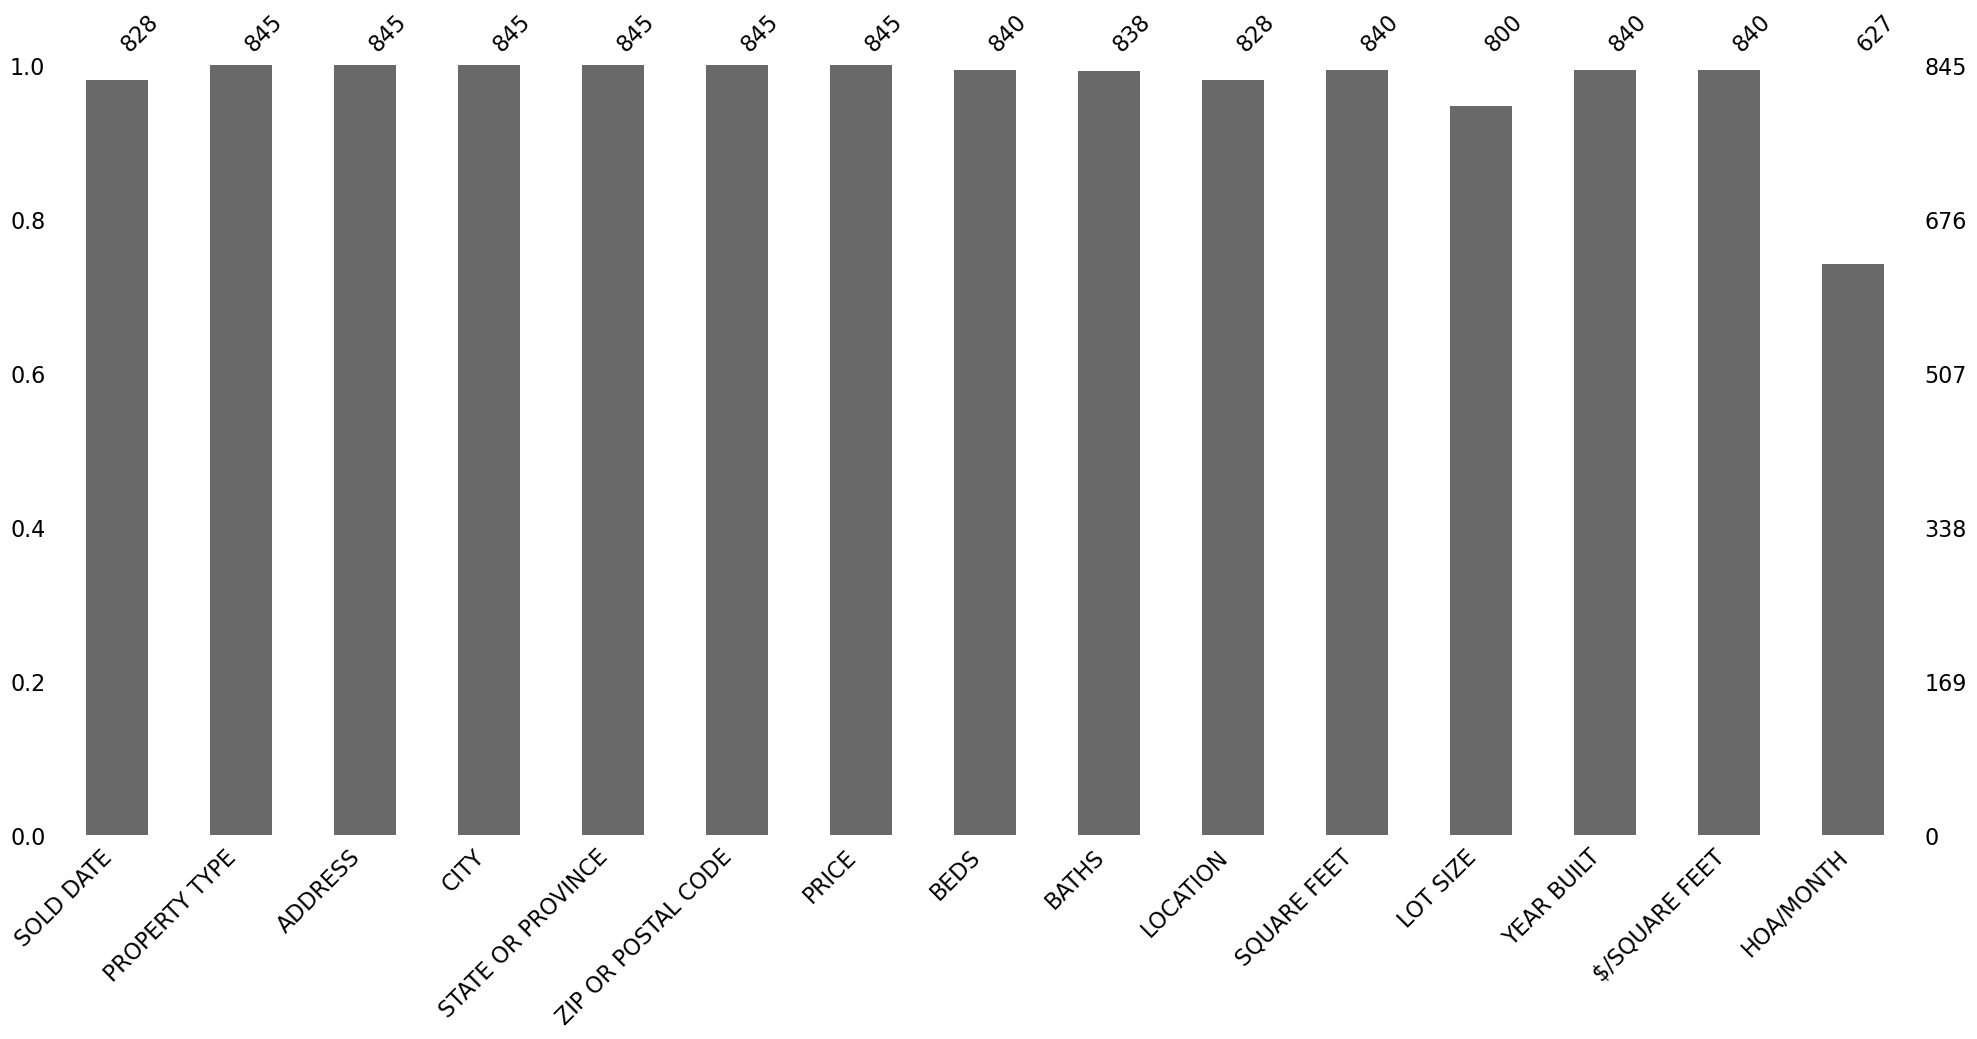

In [21]:
# Bar chart displays a count of values present per columns ignoring missing values.
ms.bar(dataset)

In [22]:
## Replacing missing lot size of condos, townhouses and mobile homes with 0
dataset.loc[(dataset['PROPERTY TYPE'] == 'Condo/Co-op') & (dataset['LOT SIZE'].isna()), 'LOT SIZE'] = 0
dataset.loc[(dataset['PROPERTY TYPE'] == 'Townhouse') & (dataset['LOT SIZE'].isna()), 'LOT SIZE'] = 0
dataset.loc[(dataset['PROPERTY TYPE'] == 'Mobile/Manufactured Home') & (dataset['LOT SIZE'].isna()), 'LOT SIZE'] = 0

In [23]:
## Assuming is HOA is NAN then its 0

dataset['HOA/MONTH'] = dataset['HOA/MONTH'].fillna(0)

In [24]:
## Vacant land data is not needed

dataset.index[dataset['PROPERTY TYPE'] == 'Vacant Land']

Int64Index([72, 261, 356, 397], dtype='int64')

In [25]:
dataset.drop(dataset.index[dataset['PROPERTY TYPE'] == 'Vacant Land'], inplace = True)


In [26]:
dataset.drop(dataset.index[dataset['SOLD DATE'].isna()], inplace = True)
dataset.drop(dataset.index[dataset['BATHS'].isna()], inplace = True)

In [27]:
MonthsToNumber = {'January' : '01',
                  'February' : '02',
                  'March' : '03',
                  'April' : '04',
                  'May' : '05',
                  'June' : '06',
                  'July' : '07',
                  'August' : '08',
                  'September' : '09',
                  'October' : '10',
                  'November' : '11',
                  'December' : '12'}

for ind in dataset.index:
    date = dataset['SOLD DATE'][ind]
    try:
        if pd.notnull(date):
            month = date.split('-')[0]
            new_date = str(date.replace(month, MonthsToNumber.get(month)))
            dataset.at[ind, 'SOLD DATE'] = new_date
            ## print(dataset.at[ind, 'SOLD DATE'])
    except Exception as e: 
        print (dataset.at[ind, 'SOLD DATE'])
        print(e)
       ## print("exception")
    ## print(dataset['SOLD DATE'][ind])
    

In [28]:
dataset.head(6)

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH
0,02-10-2023,Single Family Residential,33 194th St SW,Bothell,WA,98012,729000,3.0,2.5,Bothell,1736.0,3405.0,2011.0,420.0,83.0
1,02-9-2023,Single Family Residential,19614 3rd Dr SE #5,Bothell,WA,98012,1126969,4.0,3.5,Bothell,2680.0,3513.0,2022.0,421.0,105.0
2,02-9-2023,Townhouse,19608 3rd Dr SE #8,Bothell,WA,98012,1130500,4.0,3.5,Bothell,2680.0,3486.0,2022.0,422.0,105.0
3,02-8-2023,Single Family Residential,17724 2ND Ave W Unit IW-34,Bothell,WA,98012,1191385,5.0,3.0,Lynnwood,2528.0,4299.0,2022.0,471.0,88.0
4,02-3-2023,Townhouse,19620 3rd Dr SE #2,Bothell,WA,98012,960000,4.0,3.5,Bothell,2422.0,2275.0,2022.0,396.0,105.0
5,01-18-2023,Single Family Residential,226 Winesap Rd,Bothell,WA,98012,800000,3.0,2.5,Bothell,1938.0,10019.0,1990.0,413.0,0.0


<Axes: >

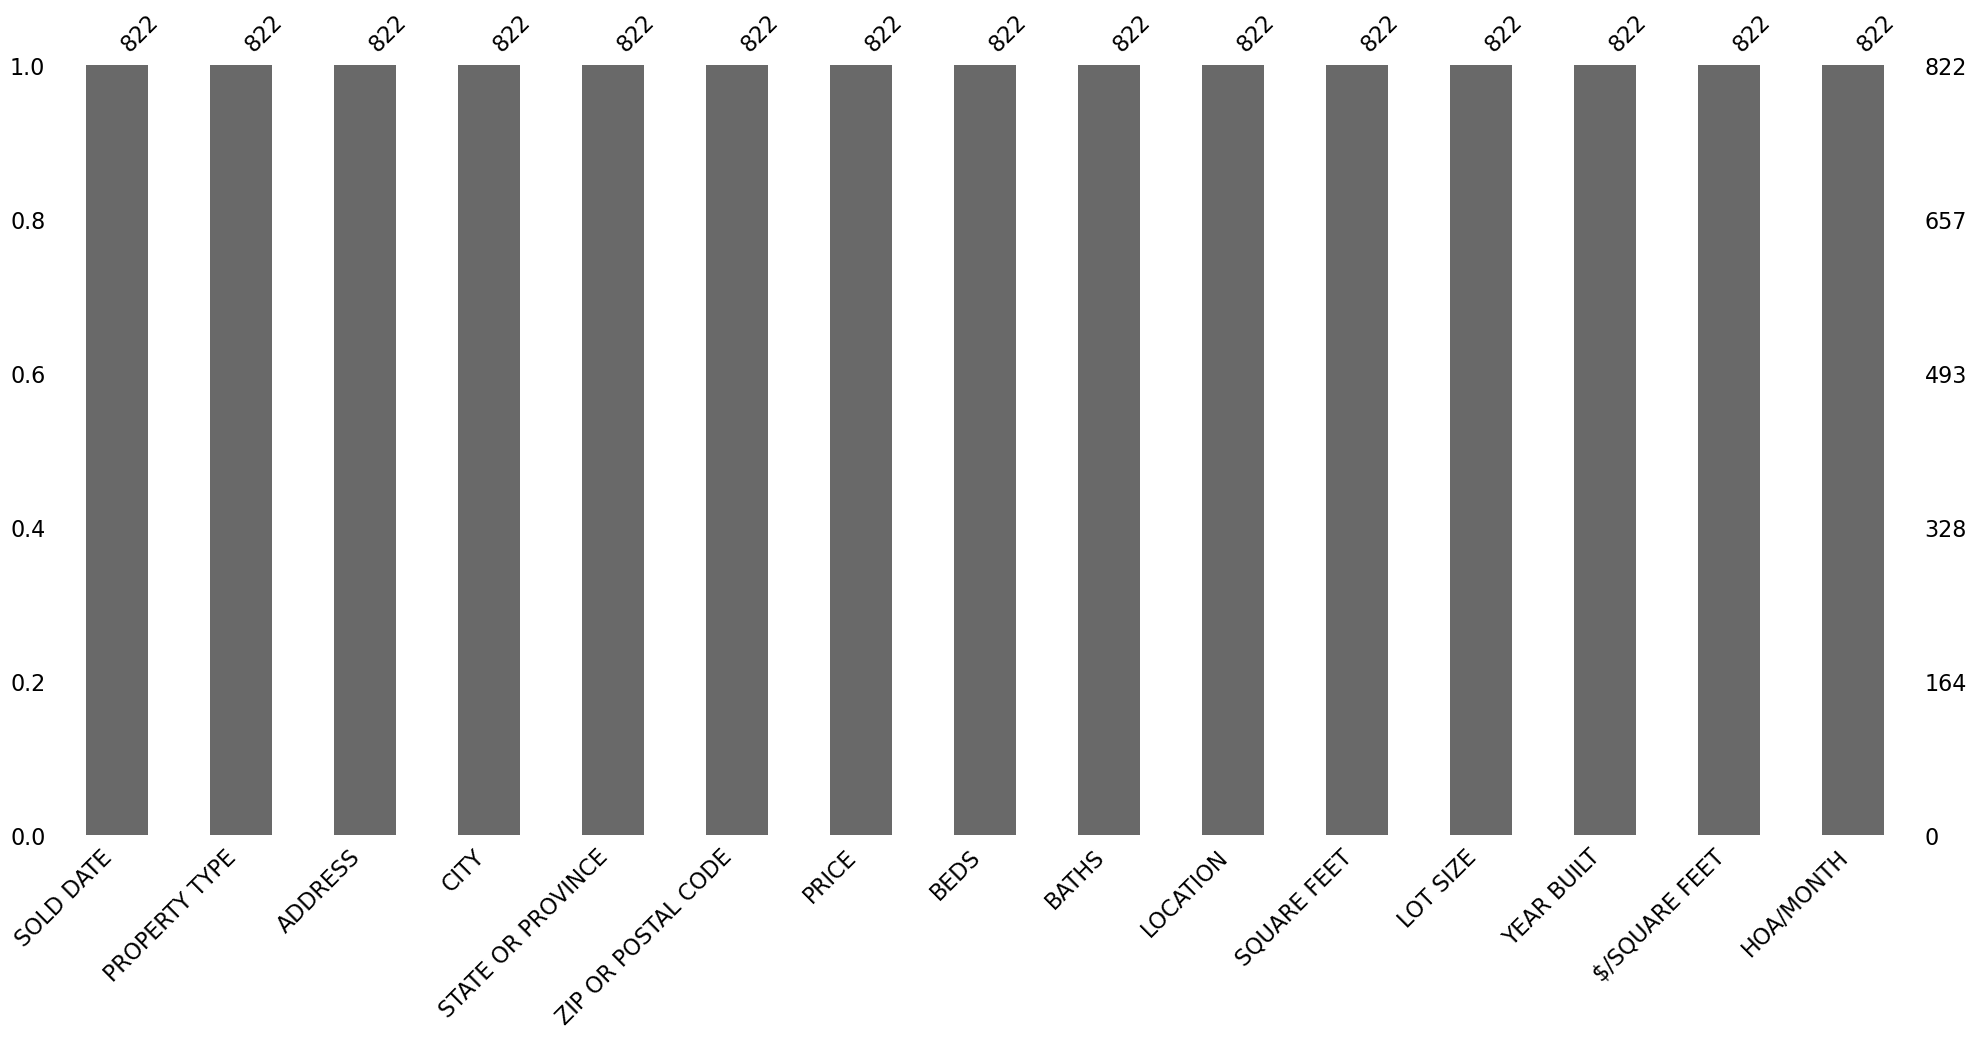

In [29]:
# Bar chart displays a count of values present per columns ignoring missing values.
ms.bar(dataset)

In [30]:
for ind in dataset.index:
    date = dataset['SOLD DATE'][ind]
    ## print(datetime.strftime(datetime.now(), '%m-%d-%Y'))
    d1 = datetime.strptime(datetime.strftime(datetime.now(), '%m-%d-%Y'), '%m-%d-%Y') - datetime.strptime(str(date), '%m-%d-%Y')
    dataset.at[ind, 'SOLD DATE'] = int(d1.days)
    ## dataset['SOLD DATE'][ind] = d1.days
    


In [31]:
dataset.head(6)

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH
0,10,Single Family Residential,33 194th St SW,Bothell,WA,98012,729000,3.0,2.5,Bothell,1736.0,3405.0,2011.0,420.0,83.0
1,11,Single Family Residential,19614 3rd Dr SE #5,Bothell,WA,98012,1126969,4.0,3.5,Bothell,2680.0,3513.0,2022.0,421.0,105.0
2,11,Townhouse,19608 3rd Dr SE #8,Bothell,WA,98012,1130500,4.0,3.5,Bothell,2680.0,3486.0,2022.0,422.0,105.0
3,12,Single Family Residential,17724 2ND Ave W Unit IW-34,Bothell,WA,98012,1191385,5.0,3.0,Lynnwood,2528.0,4299.0,2022.0,471.0,88.0
4,17,Townhouse,19620 3rd Dr SE #2,Bothell,WA,98012,960000,4.0,3.5,Bothell,2422.0,2275.0,2022.0,396.0,105.0
5,33,Single Family Residential,226 Winesap Rd,Bothell,WA,98012,800000,3.0,2.5,Bothell,1938.0,10019.0,1990.0,413.0,0.0


In [32]:
## shape of the training dataset
print('shape of the training dataset:')
print('There are {} rows and {} columns in train dataset.'.format(dataset.shape[0],dataset.shape[1]))

shape of the training dataset:
There are 822 rows and 15 columns in train dataset.


[Text(0, 0, 'Single Family Residential'),
 Text(1, 0, 'Townhouse'),
 Text(2, 0, 'Condo/Co-op'),
 Text(3, 0, 'Multi-Family (2-4 Unit)'),
 Text(4, 0, 'Mobile/Manufactured Home')]

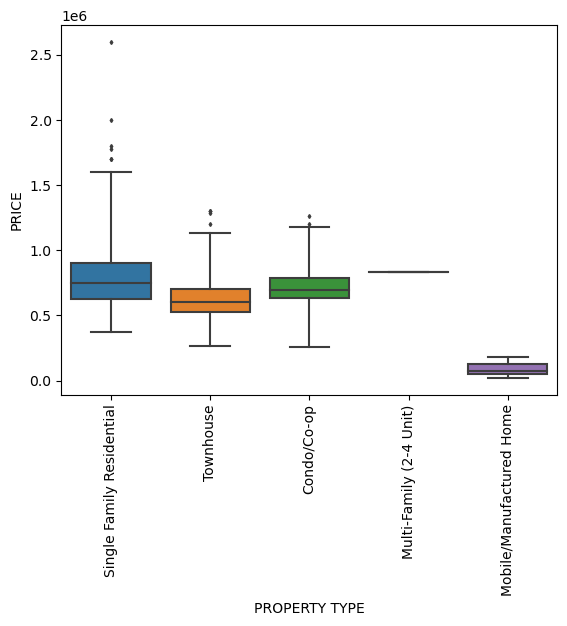

In [33]:
ax = sns.boxplot(data=dataset, x="PROPERTY TYPE", y="PRICE", whis=2.5, fliersize=2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [34]:
# convert column "a" of a DataFrame
dataset['SOLD DATE'] = pd.to_numeric(dataset['SOLD DATE'])

In [35]:
dataset.describe().style.background_gradient(cmap = "Blues")

,SOLD DATE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH
count,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000
mean,919.785888,98012.029197,728439.048662,3.503650,2.712287,2093.990268,10458.749392,2006.206813,351.661800,95.800487
std,516.199779,0.837096,254057.125187,0.896256,0.555896,544.607020,34951.389933,17.295555,98.939862,92.578553
min,10.000000,98012.000000,19810.000000,1.000000,1.000000,500.000000,0.000000,1934.000000,29.000000,0.000000
25%,501.000000,98012.000000,560000.000000,3.000000,2.500000,1701.250000,2360.000000,1994.250000,288.000000,17.750000
50%,956.000000,98012.000000,688360.000000,3.000000,2.500000,2116.000000,3888.000000,2017.000000,326.000000,81.000000
75%,1361.000000,98012.000000,818383.750000,4.000000,3.000000,2433.000000,6970.000000,2019.000000,408.500000,133.000000
max,1825.000000,98036.000000,2600000.000000,8.000000,5.000000,4925.000000,329788.000000,2022.000000,1295.000000,469.000000


/var/folders/tm/1zpz421s3310s3gw9m55mw480000gn/T/ipykernel_17192/2073536509.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  coer = dataset.corr()


<Axes: >

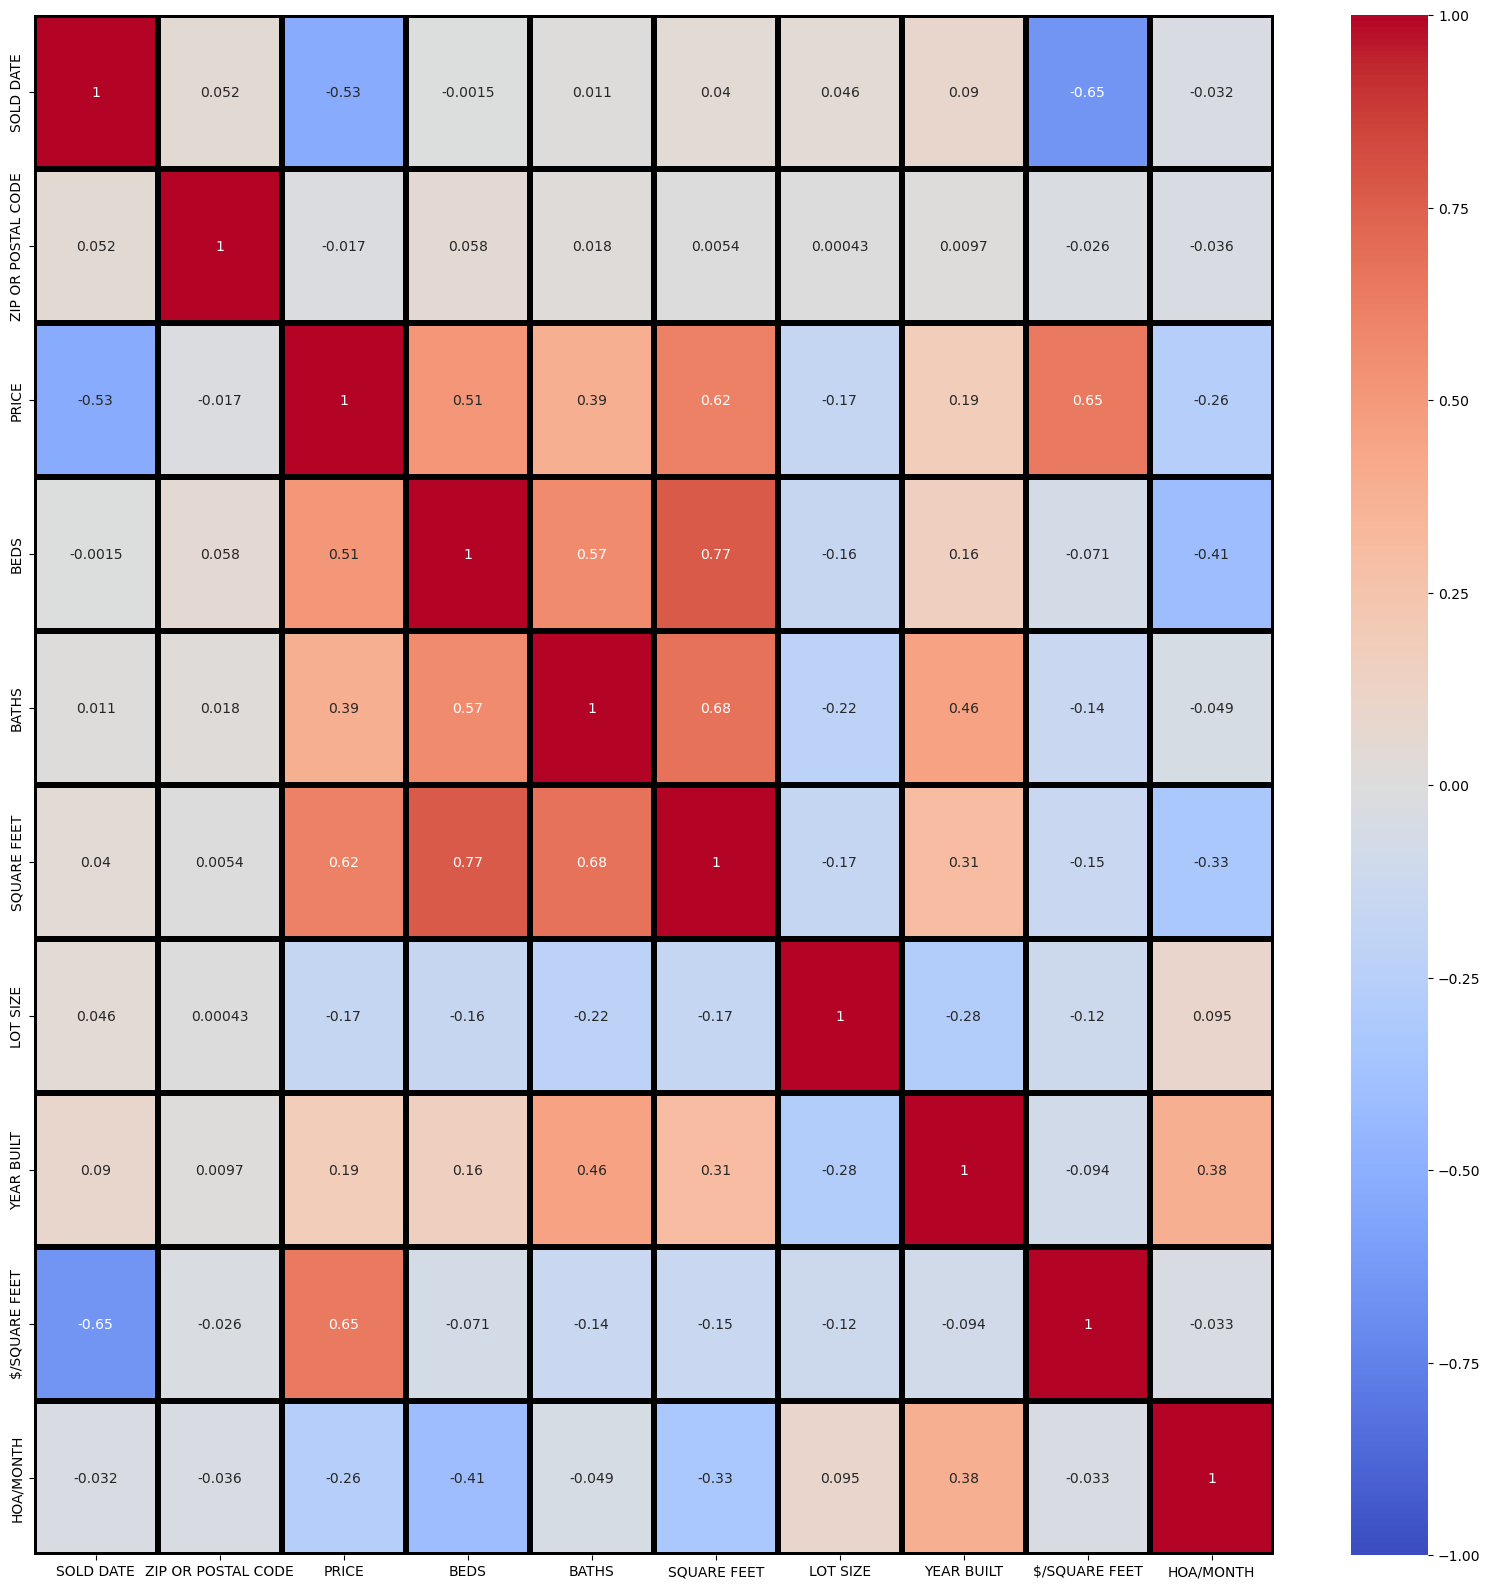

In [36]:
"""correlation matrix between numerical cols in the dataset."""
fig, ax = plt.subplots(figsize=(20,20))
coer = dataset.corr()         
sns.heatmap(coer, annot = True, ax=ax, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

In [37]:
numeric_cols = dataset.select_dtypes(include=np.number).columns.tolist()
categorical_cols = set(dataset.columns).difference(set(numeric_cols))   
print(categorical_cols)

{'PROPERTY TYPE', 'CITY', 'LOCATION', 'ADDRESS', 'STATE OR PROVINCE'}


In [38]:
for i, x in enumerate(categorical_cols):  ## print all unique values in categorical columns
    print(x, dataset[x].unique())

PROPERTY TYPE ['Single Family Residential' 'Townhouse' 'Condo/Co-op'
 'Multi-Family (2-4 Unit)' 'Mobile/Manufactured Home']
CITY ['Bothell' 'Lynnwood' 'Mill Creek']
LOCATION ['Bothell' 'Lynnwood' 'Thrashers Corner' 'North Creek' 'North Bothell'
 'Canyon Park' 'Floral Hills' 'Larch/Poplar' 'Alderwood Manor'
 'Kennard Corner' 'Martha Lake' 'Snohomish' 'Mays Pond' 'Mill Creek'
 'Mill Creek Country Club' 'Seattle Hill']
ADDRESS ['33 194th St SW' '19614 3rd Dr SE #5' '19608 3rd Dr SE #8'
 '17724 2ND Ave W Unit IW-34' '19620 3rd Dr SE #2' '226 Winesap Rd'
 '17714 2nd Ave W Unit IW 32' '17706 2nd Ave W Unit IW 30'
 '19704 Meridian Pl W #33' '17713 1st Ave W Unit IW 80'
 '19708 Meridian Pl W' '19 197th Pl SW' '200 200th Pl SE'
 '17704 1st Ave W Unit IW 52' '19611 3rd Dr SE #22' '19310 1st Ave SE'
 '19732 3rd Ave SE' '17708 1st Ave W Unit IW 53'
 '17712 1st Ave W Unit IW 54' '19723 Bartlett Rd' '27 193rd Pl SW #9'
 '19609 3rd Dr SE #21' '19808 2nd Dr SE #1' '19605 3rd Dr SE #19'
 '19622 3rd Dr 

In [39]:
dataset.drop(['STATE OR PROVINCE'],axis=1,inplace=True)  ## drop this col since it has one value
dataset.drop(['ADDRESS'],axis=1,inplace=True)

In [40]:
numeric_cols = dataset.select_dtypes(include=np.number).columns.tolist()
categorical_cols = set(dataset.columns).difference(set(numeric_cols)) 

In [41]:
lecols = []  ## names of columns that will label encoded
for x in categorical_cols:
    lecols.append(x)

In [42]:
le = LabelEncoder()
dataset[lecols] = dataset[lecols].apply(le.fit_transform)

In [43]:
dataset.head(6)

,SOLD DATE,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH
0,10,3,0,98012,729000,3.0,2.5,1,1736.0,3405.0,2011.0,420.0,83.0
1,11,3,0,98012,1126969,4.0,3.5,1,2680.0,3513.0,2022.0,421.0,105.0
2,11,4,0,98012,1130500,4.0,3.5,1,2680.0,3486.0,2022.0,422.0,105.0
3,12,3,0,98012,1191385,5.0,3.0,6,2528.0,4299.0,2022.0,471.0,88.0
4,17,4,0,98012,960000,4.0,3.5,1,2422.0,2275.0,2022.0,396.0,105.0
5,33,3,0,98012,800000,3.0,2.5,1,1938.0,10019.0,1990.0,413.0,0.0


In [44]:
sc_X = StandardScaler()  ## scalar for all numerical columns excluding target column
sc_y = StandardScaler()  ## scalar for the target column
numeric_cols = dataset.select_dtypes(include=np.number).columns.tolist()  ## list of col  names that include numerical values
## list of all numeric cols excluding the target col
numeric_cols_x = [x for i,x in enumerate(numeric_cols) if(x!='PRICE')]
## list includes target col name
numeric_cols_y = [x for i,x in enumerate(numeric_cols) if(x not in numeric_cols_x)]
dataset[numeric_cols_x] = sc_X.fit_transform(dataset[numeric_cols_x])
dataset[numeric_cols_y] = sc_y.fit_transform(dataset[numeric_cols_y]) 

In [45]:
dataset.head(6)

,SOLD DATE,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH
0,-1.763542,0.020104,-0.274892,-0.0349,0.002209,-0.562290,-0.382115,-1.269736,-0.657737,-0.201939,0.277303,0.691125,-0.138350
1,-1.761603,0.020104,-0.274892,-0.0349,1.569618,0.554141,1.417877,-1.269736,1.076678,-0.198847,0.913692,0.701238,0.099430
2,-1.761603,0.889883,-0.274892,-0.0349,1.583525,0.554141,1.417877,-1.269736,1.076678,-0.199620,0.913692,0.711352,0.099430
3,-1.759665,0.020104,-0.274892,-0.0349,1.823321,1.670573,0.517881,-0.349670,0.797408,-0.176345,0.913692,1.206903,-0.084309
4,-1.749973,0.889883,-0.274892,-0.0349,0.912007,0.554141,1.417877,-1.269736,0.602654,-0.234289,0.913692,0.448406,0.099430
5,-1.718958,0.020104,-0.274892,-0.0349,0.281844,-0.562290,-0.382115,-1.269736,-0.286602,-0.012589,-0.937621,0.620332,-1.035432


In [46]:
cols = list(dataset.columns.values)
print (cols)

['SOLD DATE', 'PROPERTY TYPE', 'CITY', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', '$/SQUARE FEET', 'HOA/MONTH']


In [47]:
## altering the DataFrame
column_to_move = dataset.pop("PRICE")

# insert column with insert(location, column_name, column_value)

dataset.insert(12, "PRICE", column_to_move)

In [48]:
dataset.head(6)

,SOLD DATE,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,PRICE
0,-1.763542,0.020104,-0.274892,-0.0349,-0.562290,-0.382115,-1.269736,-0.657737,-0.201939,0.277303,0.691125,-0.138350,0.002209
1,-1.761603,0.020104,-0.274892,-0.0349,0.554141,1.417877,-1.269736,1.076678,-0.198847,0.913692,0.701238,0.099430,1.569618
2,-1.761603,0.889883,-0.274892,-0.0349,0.554141,1.417877,-1.269736,1.076678,-0.199620,0.913692,0.711352,0.099430,1.583525
3,-1.759665,0.020104,-0.274892,-0.0349,1.670573,0.517881,-0.349670,0.797408,-0.176345,0.913692,1.206903,-0.084309,1.823321
4,-1.749973,0.889883,-0.274892,-0.0349,0.554141,1.417877,-1.269736,0.602654,-0.234289,0.913692,0.448406,0.099430,0.912007
5,-1.718958,0.020104,-0.274892,-0.0349,-0.562290,-0.382115,-1.269736,-0.286602,-0.012589,-0.937621,0.620332,-1.035432,0.281844


In [49]:
X = dataset.iloc[:, :-1].values ## independent variables
y = dataset.iloc[:, -1].values  ## dependent variables

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) ## splitting the dataset into 80% training and 20% testing


In [51]:
init_models = { 'Support vector  linear': SVR(kernel='linear'),
                'Support vector kernel': SVR(kernel='rbf'),
                'XGBOOST': XGBRegressor(),
                'Decision tree': DecisionTreeRegressor(),
                'Random forest': RandomForestRegressor(),
                'LGBM': LGBMRegressor(),
               }
R2 = []
models_names = []
for i, (key,model) in enumerate(init_models.items()):
    model.fit(X_train, y_train)
    models_names.append(key)
    R2.append(np.mean(cross_val_score(model, X_train, y_train, cv=5)))
models_scores = pd.DataFrame({'model name': models_names, 'R2 score': R2})
models_scores.head(7)

,model name,R2 score
0,Support vector linear,0.941726
1,Support vector kernel,0.873185
2,XGBOOST,0.903455
3,Decision tree,0.829456
4,Random forest,0.903327
5,LGBM,0.914652


/var/folders/tm/1zpz421s3310s3gw9m55mw480000gn/T/ipykernel_17192/3217837052.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


<Axes: title={'center': 'models R2 score'}, xlabel='model name', ylabel='R2 score'>

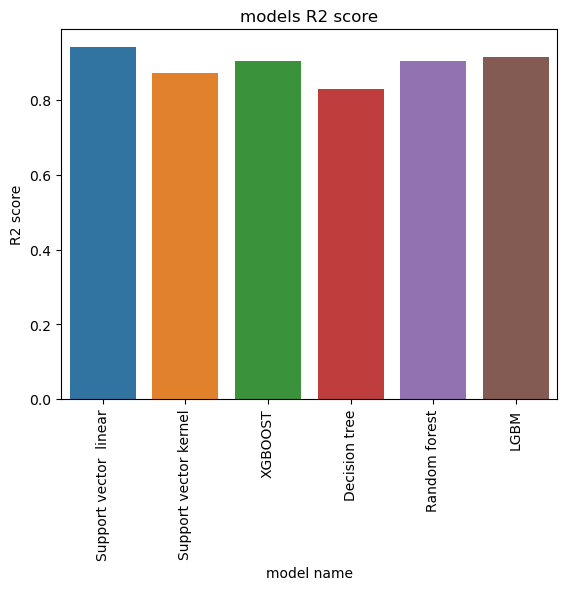

In [52]:
## plot cross validation R2 scores for the models
fig, ax = plt.subplots()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("models R2 score")
sns.barplot(data=models_scores, x='model name', y="R2 score")

In [53]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 0) 

param_grid = {"max_features": ['auto', 'sqrt'],
              "max_depth": [int(x) for x in np.linspace(5,30,6)],
              "min_samples_split": [2,5,10,15,100],
              "min_samples_leaf": [1, 2, 5, 10]} 
 
rf_cv = RandomizedSearchCV(rf, param_grid, n_iter = 40, refit='recall',
        scoring='neg_mean_squared_error', cv = 5, verbose=2, random_state=42, n_jobs = -1)  
 
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=

/Users/siddhantgupta/machine-learning-projects/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/siddhantgupta/machine-learning-projects/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/siddhantgupta/machine-learning-projects/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_spli

/Users/siddhantgupta/machine-learning-projects/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/siddhantgupta/machine-learning-projects/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/siddhantgupta/machine-learning-projects/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_sp

/Users/siddhantgupta/machine-learning-projects/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/siddhantgupta/machine-learning-projects/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/siddhantgupta/machine-learning-projects/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=10,
                                                   random_state=0),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, refit='recall',
                   scoring='neg_mean_squared_error', verbose=2)

In [54]:
xgb = XGBRegressor()

param_grid = {
    "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    "max_depth": range(3,21,3),
    "gamma": [i/10.0 for i in range(0,5)],
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]
}

xgb_cv = RandomizedSearchCV(xgb, param_grid, n_iter = 100, refit='recall',
         scoring='neg_mean_squared_error', cv = 5, verbose=2, random_state=42, n_jobs = -1) 
  
xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=18, reg_alpha=100, reg_lambda=0.1; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=3, reg_alpha=10, reg_lambda=1; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=3, reg_alpha=10, reg_lambda=1; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=3, reg_alpha=10, reg_lambda=1; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=18, reg_alpha=100, reg_lambda=0.1; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=18, reg_alpha=100, reg_lambda=0.1; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=3, reg_alpha=10, reg_lambda=1; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=3, reg_

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1],
                                        'max_depth': range(3, 21, 3),
                                        'reg_alpha': [1e-05, 0.01, 0.1, 1, 10,
                                                      100],
                                        'reg_lambda': [1e-05, 0.01, 0.1, 1, 10,
                                                       100]},
                   random_state=42, refit='recall',
                   scoring='neg_mean_squared_error', verbose=2)

In [55]:
lgbm = LGBMRegressor()

param_grid = {
    "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    "max_depth": range(3,21,3),
    "gamma": [i/10.0 for i in range(0,5)],
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]
}

lgbm_cv = RandomizedSearchCV(lgbm, param_grid, n_iter = 100, refit='recall',
         scoring='neg_mean_squared_error', cv = 5, verbose=2, random_state=42, n_jobs = -1)  
  
lgbm_cv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=18, reg_alpha=100, reg_lambda=0.1; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=3, reg_alpha=10, reg_lambda=1; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=3, reg_alpha=10, reg_lambda=1; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=18, reg_alpha=100, reg_lambda=0.1; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=3, reg_alpha=10, reg_lambda=1; total time=   0.0s
[C

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1],
                                        'max_depth': range(3, 21, 3),
                                        'reg_alpha': [1e-05, 0.01, 0.1, 1, 10,
                                                      100],
                                        'reg_lambda': [1e-05, 0.01, 0.1, 1, 10,
                                                       100]},
                   random_state=42, refit='recall',
                   scoring='neg_mean_squared_error', verbose=2)

In [56]:
print('*'*35 + ' Cross validation scores of the models after tuning ' + '*'*35 + '\n')
table = [['Model name', 'R2 score', 'RMSE'], 
         ['XGBOOST', 1+xgb_cv.best_score_, -xgb_cv.best_score_],
         ['Random forest', 1+rf_cv.best_score_, -rf_cv.best_score_],
         ['LGBM', 1+lgbm_cv.best_score_, -lgbm_cv.best_score_],]
tab = PrettyTable(table[0])
tab.add_row(table[1])
tab.add_row(table[2])
tab.add_row(table[3])
tab.hrules = ALL
tab.vrules = ALL
print(tab)
print('')
print('*'*123)

*********************************** Cross validation scores of the models after tuning ***********************************

+---------------+--------------------+---------------------+
|   Model name  |      R2 score      |         RMSE        |
+---------------+--------------------+---------------------+
|    XGBOOST    | 0.9153500166521211 | 0.08464998334787885 |
+---------------+--------------------+---------------------+
| Random forest | 0.8709400939866903 |  0.1290599060133098 |
+---------------+--------------------+---------------------+
|      LGBM     | 0.9035966912844575 | 0.09640330871554251 |
+---------------+--------------------+---------------------+

***************************************************************************************************************************


In [57]:
regressor = LGBMRegressor(**lgbm_cv.best_params_ )

In [58]:
regressor.fit(X_train, y_train)

LGBMRegressor(colsample_bytree=0.9, gamma=0.2, max_depth=3, reg_alpha=0.1,
              reg_lambda=0.1)

In [59]:
y_pred = regressor.predict(X_test) ## prediciting the value of y for the test set X_test
print(y_pred)

[-0.64335719  2.09477145  0.72526087 -0.36924346  0.32057808  0.46603654
  0.31175869 -0.59899765  1.42487823 -0.83848913  0.91239329 -1.06676186
  0.19439229  2.33851346  1.38587673 -0.92217761  0.4273979   2.88806274
  0.22328031  1.65675472 -0.90277881  0.13728934  0.13267064 -0.44735299
 -0.71642432  0.24607176 -0.64857766 -0.34887857 -0.73756719 -0.22668887
 -0.48133929 -0.07072513  0.34100838  0.62563885  0.02367827 -0.16293731
 -0.92505649 -1.0395116  -0.15214104  0.04012242 -0.89347015  0.31615013
 -0.08273592  1.37082242 -0.33900367  0.31272391 -0.57452382  1.56396025
  1.0031386  -0.28965808 -0.89347015 -0.20937209 -0.1077011  -0.78454478
 -0.88473206  1.15393464 -0.61560068 -0.47889013 -0.94327871 -0.72244008
 -0.14568726 -1.60790453  1.74294314  0.9273594  -0.78997422 -0.48133929
  0.09683823  0.01836065 -0.22660409 -0.56724066 -0.38800857  1.40139827
  0.09683823 -0.74617029 -0.71642432  0.07176593  0.12597092 -1.55520384
 -1.98768032 -0.31379759 -0.04824272 -0.76027214  1

In [60]:
y_test_pred_transformed = sc_y.inverse_transform(  [regressor.predict(X_test)]   )
y_test_transformed = sc_y.inverse_transform([y_test])
print(y_test_pred_transformed[0])
print(y_test_transformed[0])

[ 565089.0216455  1260306.84407128  912584.62610524  634687.19532132
  809834.63740205  846766.9102095   807595.37220127  576352.02208308
 1090219.25383821  515544.52574119  960098.02424084  457585.49964481
  777795.74421182 1322193.5611437  1080316.67254847  494295.80918254
  836956.46181548 1461725.51941736  785130.48730285 1149093.28289869
  499221.21471215  763297.16147895  762124.46235271  614854.9861763
  546537.09240753  790917.29461919  563763.5329164   639857.89404262
  541168.86414335  670882.16739395  606225.77982126  710481.75952778
  815021.94228774  887290.34374917  734451.02279114  687068.85209436
  493564.85499577  464504.40981839  689810.05216474  738626.23353698
  501584.7052967   808710.36992729  707432.18699396 1076494.34582277
  642365.15610383  807840.44466074  582565.99021351 1125532.53261793
  983138.48943119  654894.12551048  501584.7052967   675278.94223413
  701093.46512159  529241.13481464  503803.33029712 1021425.98663293
  572136.47157663  606847.62770482 

In [61]:
## printing the predicted values and test values side by side
np.set_printoptions(precision=2)  ## print only two decimal points
print(np.concatenate((y_test_pred_transformed[0].reshape(len(y_pred),1), y_test_transformed[0].reshape(len(y_test),1)),1))

[[ 565089.02  579995.  ]
 [1260306.84 1225000.  ]
 [ 912584.63  825000.  ]
 [ 634687.2   654500.  ]
 [ 809834.64  751000.  ]
 [ 846766.91  850000.  ]
 [ 807595.37  751000.  ]
 [ 576352.02  553905.  ]
 [1090219.25 1280000.  ]
 [ 515544.53  499995.  ]
 [ 960098.02  949950.  ]
 [ 457585.5   494850.  ]
 [ 777795.74  775000.  ]
 [1322193.56 1274950.  ]
 [1080316.67 1080000.  ]
 [ 494295.81  469995.  ]
 [ 836956.46  906140.  ]
 [1461725.52 1460000.  ]
 [ 785130.49  760000.  ]
 [1149093.28 1179995.  ]
 [ 499221.21  469950.  ]
 [ 763297.16  762000.  ]
 [ 762124.46  750000.  ]
 [ 614854.99  617000.  ]
 [ 546537.09  535000.  ]
 [ 790917.29  817195.  ]
 [ 563763.53  560000.  ]
 [ 639857.89  639995.  ]
 [ 541168.86  525000.  ]
 [ 670882.17  640075.  ]
 [ 606225.78  571055.  ]
 [ 710481.76  693060.  ]
 [ 815021.94  764995.  ]
 [ 887290.34 1000000.  ]
 [ 734451.02  749995.  ]
 [ 687068.85  690000.  ]
 [ 493564.85  520000.  ]
 [ 464504.41  474995.  ]
 [ 689810.05  713515.  ]
 [ 738626.23  730000.  ]
